In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


In [3]:
from google.colab import files
uploaded = files.upload()

Saving Boston.csv to Boston.csv


In [4]:
house_price_dataset=pd.read_csv('/content/Boston.csv')

In [5]:
house_price_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [6]:
house_price_dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [7]:
house_price_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [8]:
house_price_dataset.shape

(506, 13)

In [9]:
corelation=house_price_dataset.corr()

<Axes: >

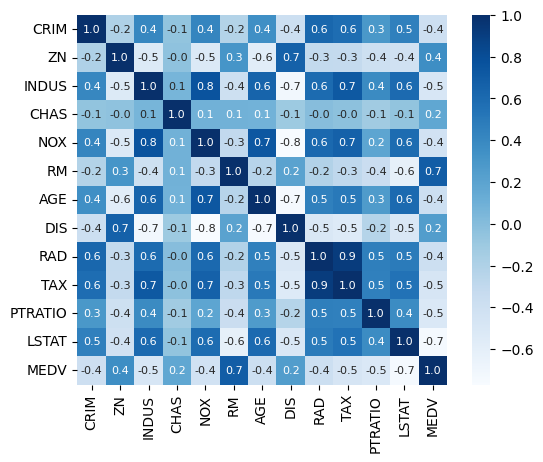

In [14]:
sns.heatmap(data=corelation,cmap='Blues',annot=True,cbar=True,square=True,fmt='.1f',annot_kws={'size':8})

In [18]:
X=house_price_dataset.drop(['MEDV'],axis=1)
y=house_price_dataset['MEDV']

In [20]:
y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [21]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48


In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [23]:
print(X.shape,X_train.shape,X_test.shape)

(506, 12) (404, 12) (102, 12)


In [26]:
model=XGBRegressor()

In [27]:
model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [28]:
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [29]:
train_predicted=model.predict(X_train)

In [32]:
train_predicted

array([23.107628 , 21.000944 , 20.10692  , 34.688187 , 13.917159 ,
       13.531015 , 21.99228  , 15.208627 , 10.898651 , 22.694256 ,
       13.775632 ,  5.6048474, 29.795067 , 49.985916 , 34.896336 ,
       20.601624 , 23.35355  , 19.177366 , 32.686558 , 19.613148 ,
       26.975828 ,  8.392004 , 45.9764   , 21.711842 , 27.07397  ,
       19.388271 , 19.295765 , 24.800789 , 22.612854 , 31.692024 ,
       18.520811 ,  8.698273 , 17.390305 , 23.696154 , 13.298362 ,
       10.499573 , 12.693844 , 24.997938 , 19.702951 , 14.906966 ,
       24.211842 , 24.99584  , 14.907067 , 16.982258 , 15.59092  ,
       12.704681 , 24.5005   , 15.007328 , 50.00193  , 17.505972 ,
       21.20768  , 31.988642 , 15.62581  , 22.903543 , 19.313862 ,
       18.7107   , 23.300743 , 37.213493 , 30.100368 , 33.1209   ,
       20.989838 , 49.996162 , 13.38858  ,  5.007038 , 16.49878  ,
        8.397542 , 28.685434 , 19.50243  , 20.583067 , 45.412052 ,
       39.814167 , 33.414646 , 19.833445 , 33.402527 , 25.2687

In [30]:
test_predicted=model.predict(X_test)

In [33]:
test_predicted

array([23.046564 , 20.68289  , 30.93837  , 29.214104 , 10.342197 ,
       11.985161 , 26.418507 , 28.662617 , 26.938091 , 21.345816 ,
       26.866354 , 25.086567 , 21.281834 , 19.546902 , 12.534112 ,
       23.441418 , 17.584167 , 12.79752  ,  7.9560847, 14.479237 ,
       22.772892 , 19.578686 , 34.77595  , 17.611824 , 15.000879 ,
       18.881542 , 45.178116 , 32.869034 , 34.32633  , 20.47927  ,
       16.20475  , 20.28799  , 30.77806  , 22.332369 , 10.78976  ,
       18.096191 , 11.7117405, 21.160208 , 22.81105  , 20.862968 ,
       26.938738 , 12.31972  , 25.890999 ,  8.7501955, 20.590155 ,
       12.915734 , 35.620872 , 14.860435 , 32.133286 , 16.905813 ,
       30.348177 , 27.613626 ,  5.8622217, 34.432323 , 26.057447 ,
       19.511358 , 18.514933 , 19.077509 , 15.415537 , 23.18484  ,
       21.638987 , 21.45824  , 19.107853 , 29.49606  , 34.471264 ,
       26.131948 , 49.794365 , 26.218498 , 10.605616 , 23.341146 ,
       16.16911  ,  9.863067 , 13.626714 , 15.814933 , 26.9008

In [38]:
train_score1=metrics.r2_score(y_train,train_predicted)
train_score2=metrics.mean_absolute_error(y_train,train_predicted)

In [39]:
test_score1=metrics.r2_score(y_test,test_predicted)
test_score2=metrics.mean_absolute_error(y_test,test_predicted)

In [40]:
print(train_score1,test_score2)
print(train_score2,test_score2)

0.9999958345837003 2.0606432849285645
0.013156773784373105 2.0606432849285645


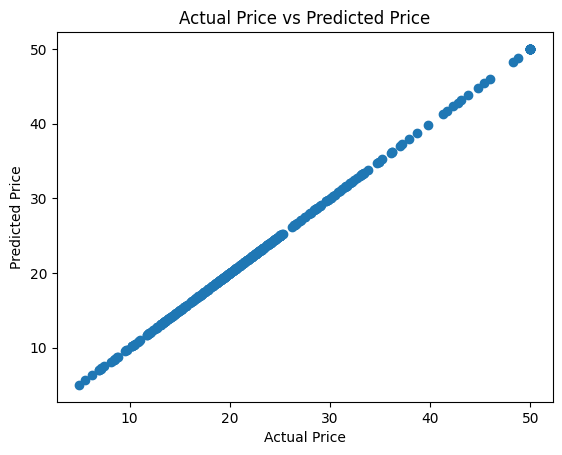

In [41]:
plt.scatter(y_train,train_predicted)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

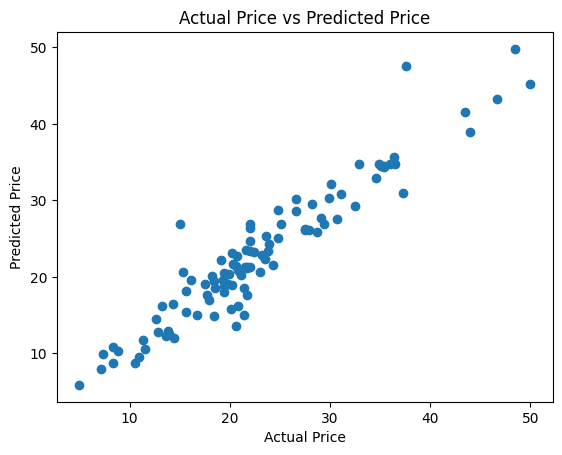

In [42]:
plt.scatter(y_test,test_predicted)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

In [43]:
input_data=(0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14)

In [44]:
input_as_numpy=np.asarray(input_data)

In [45]:
input_reshaped=input_as_numpy.reshape(1,-1)

In [46]:
predicted=model.predict(input_reshaped)

In [48]:
predicted[0]

23.441418

In [49]:
print('predicted house price for the given input is :',predicted[0],'in thousands')

predicted house price for the given input is : 23.441418 in thousands
